<a href="https://colab.research.google.com/github/mohsenshahii/Heart/blob/main/heart_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing Pandas and Seaborn libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sb
from time import time
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.tree import DecisionTreeClassifier

# Importing our Dataset

In [10]:
heart_df = pd.read_csv('https://raw.githubusercontent.com/mohsenshahii/Heart/main/heart_2020_cleaned.csv')
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Feature Extraction

In [11]:
heart_df.replace(['Yes','No'],[1 , 0], inplace = True)
F_E = pd.get_dummies(heart_df)
y_heart = F_E['HeartDisease']
x_heart = F_E.drop('HeartDisease', axis=1)
F_E

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,...,Race_White,Diabetic_0,Diabetic_1,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,5.0,...,1,0,1,0,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,7.0,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,8.0,...,1,0,1,0,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,6.0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,8.0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,6.0,...,0,0,1,0,0,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,5.0,...,0,1,0,0,0,0,0,0,0,1
319792,0,24.24,0,0,0,0.0,0.0,0,1,6.0,...,0,1,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,12.0,...,0,1,0,0,0,0,0,1,0,0


# Downsampling my Dataset to make it balanced from the target value criteria

In [ ]:
#as you can see the number of 'No' observations is much more than 'Yes' ones
heart_df['HeartDisease'].value_counts()

0    27373
1    27373
Name: HeartDisease, dtype: int64

In [ ]:
import random

mask = heart_df['HeartDisease']=='Yes'
temp = heart_df[mask]
heart_df_ = heart_df.drop(heart_df[heart_df['HeartDisease']=='Yes'].index)
temp.index=range(0,len(temp))
heart_df_.index=range(0,len(heart_df_))

#Generate 27373 random numbers between 0 and 292422
randomlist = random.sample(range(0, 292422),27373 )
temp1 = temp.append(heart_df_.loc[randomlist], ignore_index=True)
temp1 = temp1.sample(frac=1).reset_index(drop=True)
temp1

In [ ]:
temp1['Diabetic'].replace('No, borderline diabetes', 1, inplace = True)
temp1['Diabetic'].replace('Yes', 2, inplace = True)
temp1['Diabetic'].replace('Yes (during pregnancy)', 3, inplace = True)
temp1.replace('Yes', 1, inplace = True)
temp1.replace('No', 0, inplace = True)
temp1['Sex'].replace(['Female', 'Male'], [0, 1], inplace = True)
temp1['Race'].replace(['White', 'Hispanic', 'Black', 'Other', 'Asian', 'American Indian/Alaskan Native'], [1, 2, 3, 4, 5, 6] , inplace = True)
temp1['GenHealth'].replace(['Very good','Good', 'Excellent', 'Fair', 'Poor'], [5, 4, 3, 2, 1], inplace = True)
temp1['AgeCategory'].replace(['18-24','25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace = True)

# Turning tha Raw Data to a format apropriate for machine learning tools

In [ ]:
heart_df['Diabetic'].replace('No, borderline diabetes', 1, inplace = True)
heart_df['Diabetic'].replace('Yes', 2, inplace = True)
heart_df['Diabetic'].replace('Yes (during pregnancy)', 3, inplace = True)
heart_df.replace('Yes', 1, inplace = True)
heart_df.replace('No', 0, inplace = True)
heart_df['Sex'].replace(['Female', 'Male'], [0, 1], inplace = True)
heart_df['Race'].replace(['White', 'Hispanic', 'Black', 'Other', 'Asian', 'American Indian/Alaskan Native'], [1, 2, 3, 4, 5, 6] , inplace = True)
heart_df['GenHealth'].replace(['Very good','Good', 'Excellent', 'Fair', 'Poor'], [5, 4, 3, 2, 1], inplace = True)
heart_df['AgeCategory'].replace(['18-24','25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace = True)

# Introducing Test part and Train part

In [ ]:
y_heart = heart_df['HeartDisease']
x_heart = heart_df.drop('HeartDisease', axis=1)

# Using sklearn tools to predict the Target Variable

In [31]:
def apply_model(x, y,model):
  '''
    This function receives the X and y dataset set, a model name, splits into train and test, 
    applies the model on the train data, make prediction after training, 
    and returns the accuracy and precision
  '''
  x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.3, random_state=1)
  model_ = model
  model_.fit(x_train, y_train)
  y_pred = model_.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
 
  precision = precision_score(y_test, y_pred)

  return("Accuracy score:", accuracy,
          "Precision score:", precision
          ) 

In [42]:
apply_model(x_heart,y_heart,GaussianNB())

('Accuracy score: 0.7121608522081739', 'Precision score: 0.19889280633389003')

In [37]:
apply_model(x_heart,y_heart,DecisionTreeClassifier())

('Accuracy score: 0.8656854876536132', 'Precision score: 0.23308947664603263')

In [47]:
apply_model(x_heart,y_heart,AdaBoostClassifier(n_estimators=50,learning_rate=1))

('Accuracy score: 0.9163322527856242', 'Precision score: 0.5309498399146211')

In [ ]:
CM = confusion_matrix(y_test, y_pred, normalize='all')
CM

array([[0.90413889, 0.01018149],
       [0.07486022, 0.0108194 ]])

# Depicting distribution of differnet variables by histogram

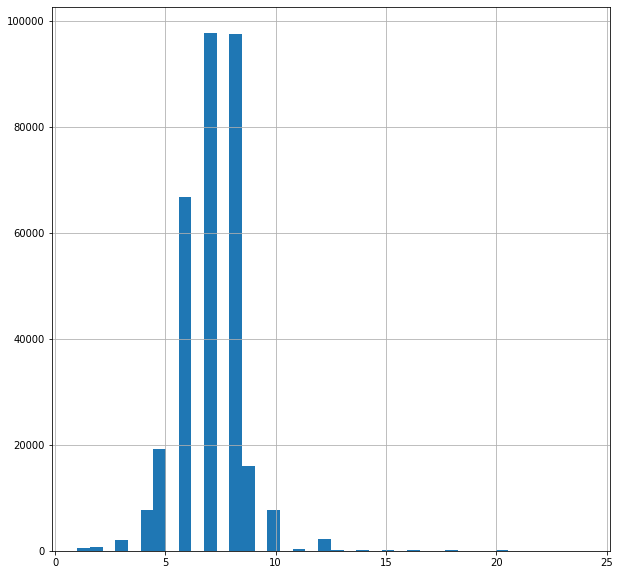

In [ ]:
heart_df['SleepTime'].hist(bins=40,figsize=(10,10))
plt.show()

# importing matplotlib to use it's data visualization functions

In [ ]:
import matplotlib.pyplot as plt

# illustrating correlation between different variables by using heatmap func.

In [ ]:
plt.figure(figsize=(10,10))
heart_df.corr()
#sb.heatmap(heart_df.corr())
#plt.show()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,-0.027635,0.168553,-0.100030,-0.167840,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,0.020273,0.202472,-0.150616,-0.063676,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,-0.040553,0.053847,-0.097174,-0.074660,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,-0.028397,-0.057372,0.017487,0.018582,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,0.006963,0.101518,-0.079455,-0.125629,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,0.004970,0.151361,-0.232283,-0.417940,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,0.020785,0.032945,-0.095808,-0.174646,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,0.012960,0.205502,-0.278524,-0.321570,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,-0.008166,-0.013456,0.048247,0.008354,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,-0.149403,0.193745,-0.121687,-0.060892,0.104953,-0.058108,0.123190,0.263537


<Figure size 720x720 with 0 Axes>

# Physical Health (the number of injuries and illnesses during the past 30 days) and GenHealth(General Health) have a strong negative correlation

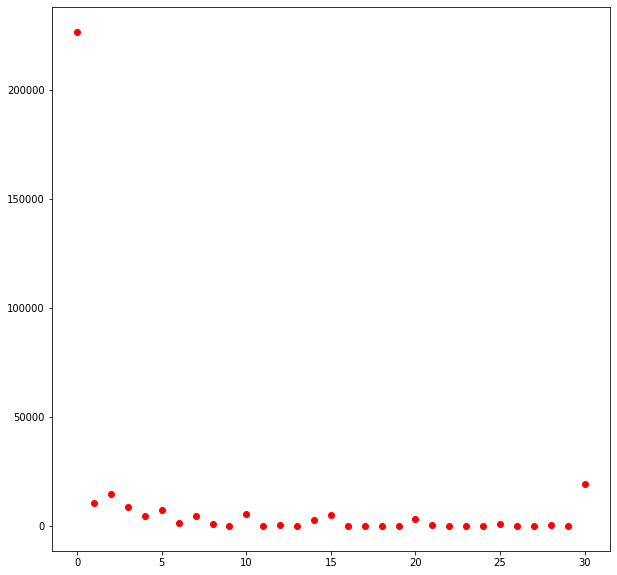

In [ ]:
plt.figure(figsize=(10,10))
temp=heart_df.groupby('PhysicalHealth').count()
plt.plot(temp.index, temp['GenHealth'],'ro')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(heart_df['BMI'],heart_df['HeartDisease'])

# Considering Sleep Time and Mental Health: There should be a positive correlation between Mental Health and the quantity of occuranse of sleep hours in the dataset because SleepTime is normaly distributed and the more normal a value is the more times it is apeared so instead of calculating the correlation between Sleep Time and Mental Health we calculate correlation between occuranse percentage of a Sleep Time and Mental Health.

In [ ]:
from scipy.stats.stats import pearsonr   
occurance_ = heart_df['SleepTime'].value_counts()
normalized_ = occurance_[heart_df['SleepTime']]/len(heart_df)
print(pearsonr(heart_df['SleepTime'],normalized_))

(0.17015308376619265, 0.0)


In [ ]:
from numpy.lib.function_base import corrcoef
occurance_ = heart_df['SleepTime'].value_counts()
normalized_ = occurance_[heart_df['SleepTime']]/len(heart_df)
corrcoef(heart_df['SleepTime'],normalized_)

array([[1.        , 0.17015308],
       [0.17015308, 1.        ]])

# Line graphing the variables of Sleep Time and Mental health in the same figure

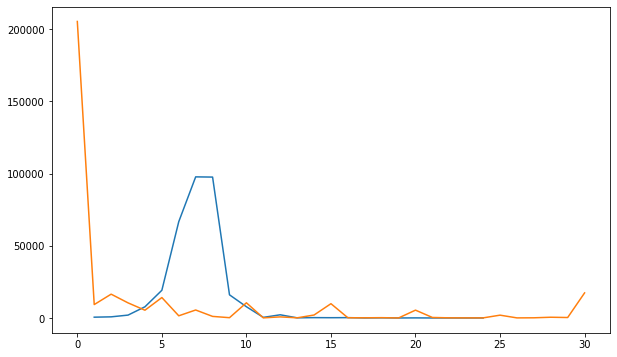

1.0       551
2.0       788
3.0      1992
4.0      7750
5.0     19184
6.0     66721
7.0     97751
8.0     97602
9.0     16041
10.0     7796
11.0      415
12.0     2205
13.0       97
14.0      243
15.0      189
16.0      236
17.0       21
18.0      102
19.0        3
20.0       64
21.0        2
22.0        9
23.0        3
24.0       30
Name: SleepTime, dtype: int64

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(heart_df['SleepTime'].value_counts().sort_index())
plt.plot(heart_df['MentalHealth'].value_counts().sort_index())
plt.show()
heart_df['SleepTime'].value_counts().sort_index()

In [ ]:
from collections import Counter
counts = Counter(heart_df['SleepTime'])
print(counts[2.0])

788


In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(heart_df['PhysicalHealth'], heart_df['SleepTime'], c=heart_df['HeartDisease'])

# The percentage of Smoking people is shown in orange color in comparison with non smoking poeple that is blue

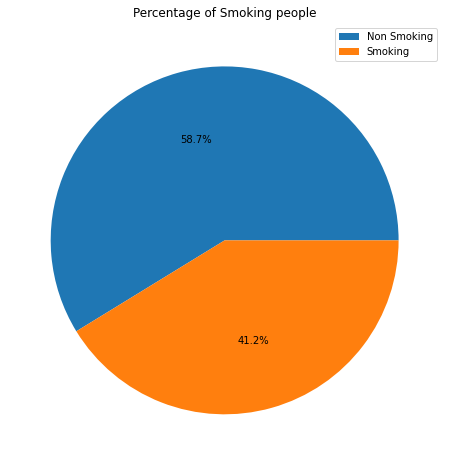

In [ ]:
plt.figure(figsize=(15,8))
plt.pie(heart_df['Smoking'].value_counts(),autopct=lambda x:str(x)[:4]+'%')
plt.legend(['Non Smoking', 'Smoking'])
plt.title('Percentage of Smoking people')
plt.show()

In [ ]:
heart_df.groupby('AgeCategory').sum()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
AgeCategory,,,,,,,,,,,,,,,,,
1,130,542666.98,3284,1521,61,35787.0,129597.0,20737,11630,37753,933,18062,83220,151375.0,3727,132,67
2,133,469460.39,5154,1571,90,30557.0,97137.0,16591,8999,29966,1109,14338,66844,118455.0,2868,115,83
3,226,533335.46,7172,1578,131,37850.0,99251.0,18166,9623,32241,2066,15758,73834,128883.0,2845,164,159
4,296,592633.92,8642,1825,193,46065.0,103773.0,19581,10092,34345,3033,16960,80206,140869.0,2879,256,263
5,486,613370.25,9081,1806,293,54087.0,98207.0,19685,10054,34634,3956,17066,81561,144457.0,3065,366,414
6,744,642555.33,8725,1684,428,65827.0,95569.0,19885,10353,35216,5192,17289,83801,150446.0,3135,451,773
7,1383,746867.81,9973,1959,685,91568.0,109695.0,22274,12047,39627,7366,19744,96766,175749.0,3472,700,1289
8,2202,865898.25,12672,2218,1101,119844.0,120693.0,25107,14270,44193,10142,22972,112274,207272.0,3943,998,2188
9,3327,970890.40,15436,2334,1483,145447.0,119604.0,27714,16114,48659,12803,25575,126269,237793.0,4498,1372,3338


# One of intresting points is the percentage of Smoking people in different Age Categories

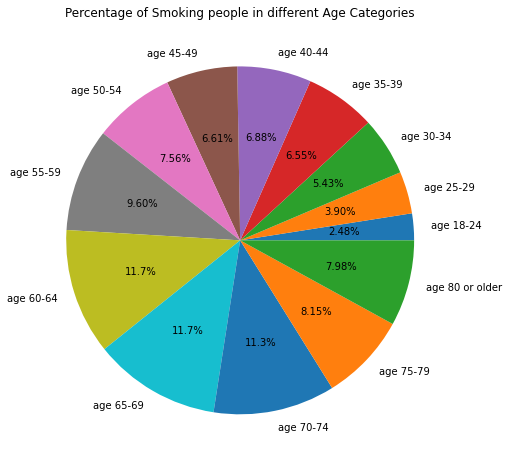

In [ ]:
temp = heart_df.groupby('AgeCategory').sum()
plt.figure(figsize=(15,8))
plt.pie(temp['Smoking'], labels='age ' + Age_Cat.index, autopct=lambda x:str(x)[:4]+'%')
plt.title('Percentage of Smoking people in different Age Categories')
plt.show()